# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\Damian\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


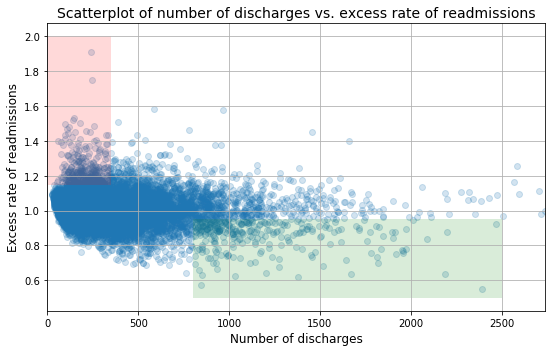

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

# A. Do you agree with the above analysis and recommendations? Why or why not?

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
**Although it appears that the rate of readmissions is trending down with increasing number of discharges, it is very difficult to tell if it is trending down or up based on the scatterplot. The distribution may be more heavily weighted on the bottom of the scatterplot. Also, the outliers at the low number of discharges skew the visual representation of the plot.**
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
**It appears as though there is a greater incidence of excess rate of readmissions for a lower number of discharges.**
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 
**It appears as though there is a greater incidence of lower rates of readmissions for a higher number of discharges, but there also appears to be a lack of datapoints to provide a confident recommendation.**



**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 


In [35]:
df_100 = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'].between(0,100, inclusive=False)]
mdf_100 = round(np.mean(df_100['Excess Readmission Ratio']),3)
Morethan1 = round(len(df_100[df_100['Excess Readmission Ratio'] > 1])/(len(df_100)),2)
print('Mean excess readmission rate is: ',mdf_100)
print(Morethan1*100,'% have excess readmission rates greater than 1')

Mean excess readmission rate is:  1.023
63.0 % have excess readmission rates greater than 1


+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

In [36]:
df_1000 = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges']>1000]
mdf_1000 = round(np.mean(df_1000['Excess Readmission Ratio']),3)
Morethan1B = round(len(df_1000[df_1000['Excess Readmission Ratio'] > 1])/(len(df_1000)),2)
print('Mean excess readmission rate is: ',mdf_1000)
print(Morethan1B*100,'% have excess readmission rates greater than 1')

Mean excess readmission rate is:  0.978
44.0 % have excess readmission rates greater than 1


**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 


In [37]:
clean_hospital_read_df

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15625,FAIRVIEW DEVELOPMENTAL CENTER,50548,CA,READM-30-HF-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15642,WAGONER COMMUNITY HOSPITAL,370166,OK,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15648,ST LUKE'S HOSPITAL AT THE VINTAGE,670075,TX,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15652,SOUTH TEXAS SURGICAL HOSPITAL,670061,TX,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15396,GEORGE L MEE MEMORIAL HOSPITAL,50189,CA,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


In [60]:
df1 = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges']>0]
df1

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
1832,UNIVERSITY OF MD CHARLES REGIONAL MEDICAL CENTER,210035,MD,READM-30-AMI-HRRP,25,NaN,1.0914,26.8,24.6,12.0,07/01/2010,06/30/2013
1699,ATLANTIC GENERAL HOSPITAL,210061,MD,READM-30-AMI-HRRP,27,NaN,1.0961,24.8,22.6,12.0,07/01/2010,06/30/2013
1774,MERCY MEDICAL CENTER INC,210008,MD,READM-30-AMI-HRRP,28,NaN,1.0934,24.4,22.3,12.0,07/01/2010,06/30/2013
1853,KAISER FOUNDATION HOSPITAL-SANTA CLARA,50071,CA,READM-30-HF-HRRP,29,NaN,1.0908,21.0,19.3,11.0,07/01/2010,06/30/2013
1290,PALMERTON HOSPITAL,390019,PA,READM-30-AMI-HRRP,30,NaN,1.1123,23.2,20.9,13.0,07/01/2010,06/30/2013
1602,TENNOVA HEALTHCARE-JEFFERSON MEMORIAL HOSPITAL,440056,TN,READM-30-AMI-HRRP,31,NaN,1.0992,24.2,22.1,13.0,07/01/2010,06/30/2013
2048,FORT MADISON COMMUNITY HOSPITAL,160122,IA,READM-30-AMI-HRRP,33,NaN,1.0847,22.6,20.9,12.0,07/01/2010,06/30/2013
2441,ISLAND HOSPITAL,500007,WA,READM-30-AMI-HRRP,34,NaN,1.0738,20.8,19.3,11.0,07/01/2010,06/30/2013
2512,NORTH CENTRAL BRONX HOSPITAL,330385,NY,READM-30-HF-HRRP,34,NaN,1.0720,23.3,21.8,12.0,07/01/2010,06/30/2013
2825,KAISER FOUNDATION HOSPITAL FONTANA,50140,CA,READM-30-PN-HRRP,34,NaN,1.0651,20.7,19.4,11.0,07/01/2010,06/30/2013


**1. Setup an appropriate hypothesis test <br>**
Ho: p = 0 (hospital capacity and readmission rates are not correlated) <br>
Ha: p != 0 (hospital capacity and readmission rates are correlated) <br>
**2. Compute and report the observed significance value (or p-value).**


In [63]:
from scipy import stats

r = round(stats.pearsonr(df1['Number of Discharges'],df1['Excess Readmission Ratio'])[0],3)
p = stats.pearsonr(df1['Number of Discharges'],df1['Excess Readmission Ratio'])[1]
print('R value:',r)
print('P value:',p)

R value: -0.097
P value: 1.222547377680967e-25


With an R value of -0.097, there is a weak, negative correlation between number of discharges and readmission rates. A P value of 0.0 indicates that there is a 0.0% probability of seeing these values for number of discharges and readmission rates if the variables were unrelated. 

   **3. Report statistical significance for $\alpha$ = .01.**
   
The Pearson R is not normally distributed, so calculating the confidence interval is different than calculating confidence intervals for normally distributed systems. We can calculate confidence intervals using the following equations:

In [68]:
alpha = 0.01 #99% confidence level / significance
n = len(df1)

def r_to_z(r):
    return np.log((1 + r) / (1 - r)) / 2.0

def z_to_r(z):
    e = np.exp(2 * z)
    return((e - 1) / (e + 1))

def r_confidence_interval(r, alpha, n):
    z = r_to_z(r)
    se = 1.0 / np.sqrt(n - 3)
    z_crit = stats.norm.ppf(1 - alpha/2)  # 2-tailed z critical value

    lo = z - z_crit * se
    hi = z + z_crit * se

    # Return a sequence
    return (z_to_r(lo), z_to_r(hi))


rlo = r_confidence_interval(r,alpha,n)[0]
rhi = r_confidence_interval(r,alpha,n)[1]

print('We are 99% confident that the correlation between number of discharges and readmission rates is between',
      round(rlo,3),'and',round(rhi,3))

We are 99% confident that the correlation between number of discharges and readmission rates is between -0.121 and -0.073


   **4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?**
   
We have established that there is a statistically significant weak, negative correlation between number of discharges and readmission rates. This means that it is reasonable to expect lower readmission rates with increasing number of discharges. Although there is a correlation between the datasets, this analysis does not prove that lower readmission rates are caused by increasing number of discharges. I expect that the correlation between number of discharges and readmission rates found in this analysis would be practically significant if there is also a statistically significant, moderate to strong positive correlation between the size of the hospital and number of discharges.

Since the analysis did not cover the correlation between the size of the facility and the number of discharges, I cannot recommend through statistical analysis alone that smaller hospitals/facilities are lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.


   **5. Look at the scatterplot above. What are the advantages and disadvantages of using this plot to convey information?**
      
**Advantage:** The scatterplot is a good representation of the data. It appears as though there is a slight negative correlation, and statistical analysis of the data using Pearson's R correlation coefficient indicates with 99% confidence that the correlation between number of discharges and readmission rates is between -0.121 and -0.073.
     
**Disadvantage:** It is hard to infer from the scatterplot that the relationship between number of discharges and readmission rates is different for hospitals with low a number of discharges than it is for hospitals with a high number of discharges.

**Construct another plot that conveys the same information in a more direct manner.**

I am constructing two plots with the trend line superimposed onto the plots. The first plot represents hospitals with less than 300 discharges. The second plot represents hospitals with greater than 300 discharges.



-4.1911593475986696e-05


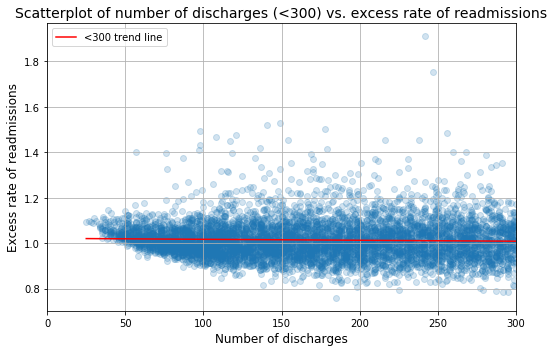

In [116]:
df_300 = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'].between(0,301, inclusive=False)]

x = list(df_300['Number of Discharges'])
y = list(df_300['Excess Readmission Ratio'])
slope_300, intercept_300, r_value, p_value, std_err = stats.linregress(x,y)

x_300 = list(df_300['Number of Discharges'].sort_values())
y_300 = slope_300*np.asarray(x_300) + intercept_300



fig, ax = plt.subplots(figsize=(8,5))
ax.plot(x_300, y_300, c='r', label='<300 trend line')
ax.scatter(x, y,alpha=0.2)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges (<300) vs. excess rate of readmissions', fontsize=14)
ax.legend()
ax.grid(True)
fig.tight_layout()
print(slope_300)

-2.3368111754496215e-05


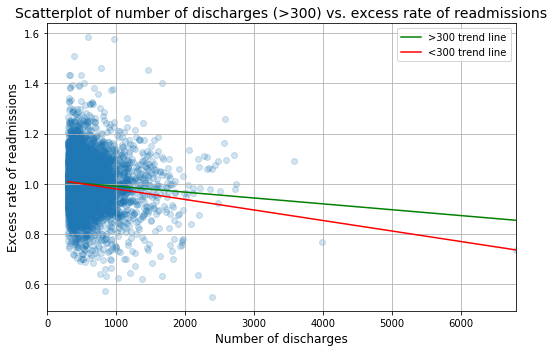

In [114]:
df_rest = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges']>300]

x = list(df_rest['Number of Discharges'])
y = list(df_rest['Excess Readmission Ratio'])
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

x_rest = list(df_rest['Number of Discharges'].sort_values())
y_rest = slope*np.asarray(x_rest) + intercept
y_300 = slope_300*np.asarray(x_rest) + intercept_300


fig, ax = plt.subplots(figsize=(8,5))
ax.plot(x_rest, y_rest, c='g', label='>300 trend line')
ax.plot(x_rest, y_300, c='r', label='<300 trend line')
ax.scatter(x, y,alpha=0.2)

ax.set_xlim([0, max(x_rest)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges (>300) vs. excess rate of readmissions', fontsize=14)
ax.legend()
ax.grid(True)
fig.tight_layout()
print(slope)

**D. Regulatory policy recommendations**
+ Hospitals/facilities with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

The derivative of the trend line describing the relationship between number of discharges and excess rate of readmissions seems to decrease as the number of discharges increases. This suggests that hospitals with less than 300 discharges will experience a greater reduction of readmission rates when increasing the number of discharges than the reduction hospitals with greater than 300 discharges would experience. 
I recommend using the standard work of hospitals with less than 300 discharges who have low excess readmission rates as a starting point for benchmarking hospitals of similar size in order to lower excess readmission rates.